In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from DalitzPhaseSpace import *

%matplotlib inline
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

In [2]:
def phsp_edge(phsp, rtype1, rtype2):
    """ Calculate phase space edges """
    mr1_min, mr1_max = phsp.mass_sq_range[rtype1]
    mr1_space = np.linspace(mr1_min, mr1_max, 1000)
    mr2_mins, mr2_maxs = phsp.mr_sq_range(rtype2, mr1_space, rtype1)
    mr1 = np.concatenate([mr1_space, mr1_space[::-1]])
    mr2 = np.concatenate([mr2_mins, mr2_maxs[::-1]])
    return [mr1, mr2]

In [3]:
def show_phase_space(phsp, rtype1, rtype2, num=None, color=None):
    """ Plot phase space edge """
    if color is None:
        color = 'blue'
    mr1, mr2 = phsp_edge(phsp, rtype1, rtype2)
    mr1_range = max(mr1) - min(mr1)
    mr2_range = max(mr2) - min(mr2)
    fig = plt.figure(num=num)
    plt.plot(mr1, mr2, linestyle='-', color=color)
    plt.gca().set_xlabel(r'$m^{2}_{\mathrm{' + rtype1 + r'}}\ (GeV^{2}/c^{4})$')
    plt.gca().set_ylabel(r'$m^{2}_{\mathrm{' + rtype2 + r'}}\ (GeV^{2}/c^{4})$')
    plt.axis('equal')
    plt.tight_layout()
    plt.xlim(0, 1.05*max(mr1))
    plt.ylim(0, 1.05*max(mr2))

In [4]:
phsp = DalitzPhaseSpace(0.475, 0.135, 0.135, 1.865)
phsp_ppp = DalitzPhaseSpace(0.135, 0.135, 0.135, 1.865)

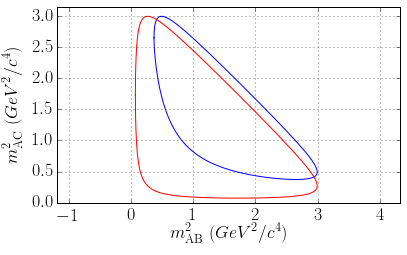

In [5]:
show_phase_space(phsp, 'AB', 'AC', 1)
show_phase_space(phsp_ppp, 'AB', 'AC', 1, 'red')
plt.grid()

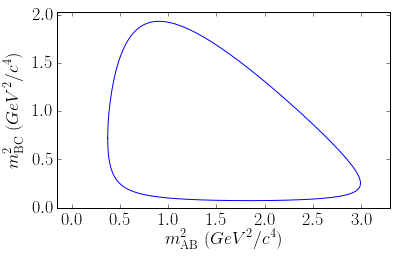

In [6]:
show_phase_space(phsp, 'AB', 'BC')

In [7]:
mABsq, mBCsq = phsp.uniform_sample('AB', 'BC', 100000)

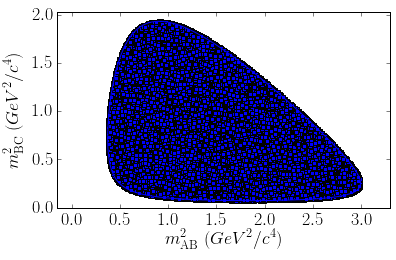

In [8]:
show_phase_space(phsp, 'AB', 'BC')
plt.scatter(mABsq, mBCsq, marker=',');

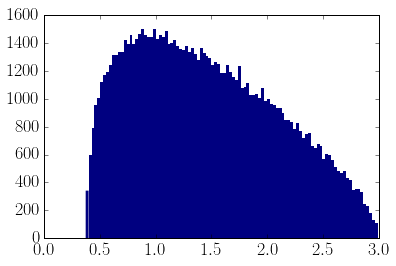

In [9]:
plt.hist(mABsq, bins=100, edgecolor="none", color=["navy"]);

In [10]:
import matplotlib.colors as colors

In [11]:
def plot_ddist(mab, mbc, bins=200, num=None):
    """ Scatter plot of Dalitz distribution """
    fig = plt.figure(num=num, figsize=(10,6))
    ax = fig.add_subplot(111)
    hist = ax.hist2d(mab, mbc, bins=bins, cmap=plt.cm.PuBu)
    fig.colorbar(hist[3], ax=ax, pad=0.02)

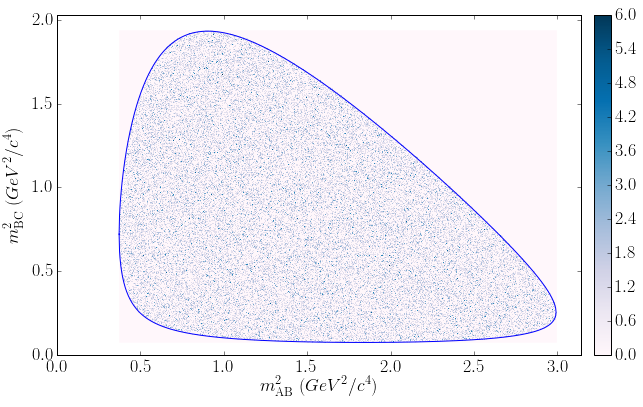

In [12]:
plot_ddist(mABsq, mBCsq, 500, 5)
show_phase_space(phsp, 'AB', 'BC', 5)

In [13]:
FIG = plt.figure(num=9, figsize=(5, 5))
XLIMS = (0, 1.05*phsp.mass_sq_range['AB'][1])
YLIMS = (0, 1.05*phsp.mass_sq_range['BC'][1])
AXES = plt.axes(xlim=XLIMS, ylim=YLIMS)
LINE, = AXES.plot([], [], lw=1, linestyle='-', color='blue')
show_phase_space(phsp, 'AB', 'BC', 9, 'red')
show_phase_space(phsp_ppp, 'AB', 'BC', 9, 'red')
plt.close()

In [14]:
def init():
    """ Init frame """
    LINE.set_data([], [])
    return LINE,

In [15]:
def animate(i):
    """ Update frame """
    x, y = 0.475, 0.135
    ma = x + (y - x) * abs(i - 100) / 100
    phsp.set_ma(ma)
    mr1, mr2 = phsp_edge(phsp, 'AB', 'BC')
    LINE.set_data(mr1, mr2)
    return LINE,

In [16]:
def phsp_animated(nframes=200):
    """ Make animation! """
    anim = animation.FuncAnimation(FIG, animate, init_func=init,
                                   frames=nframes, interval=20, blit=True)
    # anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    # anim.save('basic_animation.gif', dpi=80, writer='imagemagick')
    return anim

In [17]:
phsp_animated(200)